**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

from imblearn.over_sampling import RandomOverSampler
import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/1st work/Dataset/hmnist_28_28_RGB.csv')
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [ ]:
data.columns

Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

In [ ]:
data.isnull().any().sum()

0

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/1st work/Dataset/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
#classes = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

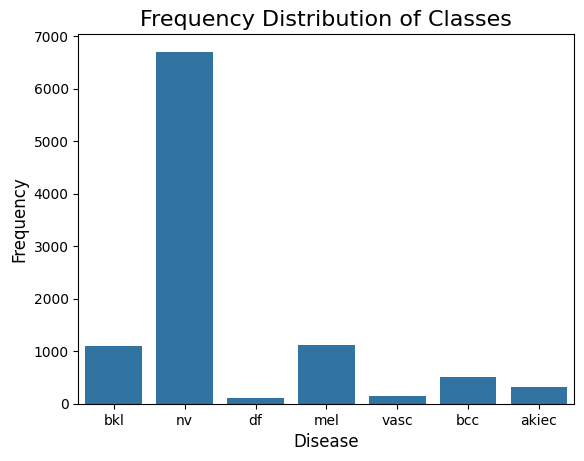

In [ ]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

**Oversampling**

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x= np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
y = to_categorical(y)

In [ ]:
y.shape

(46935, 7)

In [ ]:
x = (x-np.mean(x))/np.std(x)

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
Y_train.shape

(37548, 7)

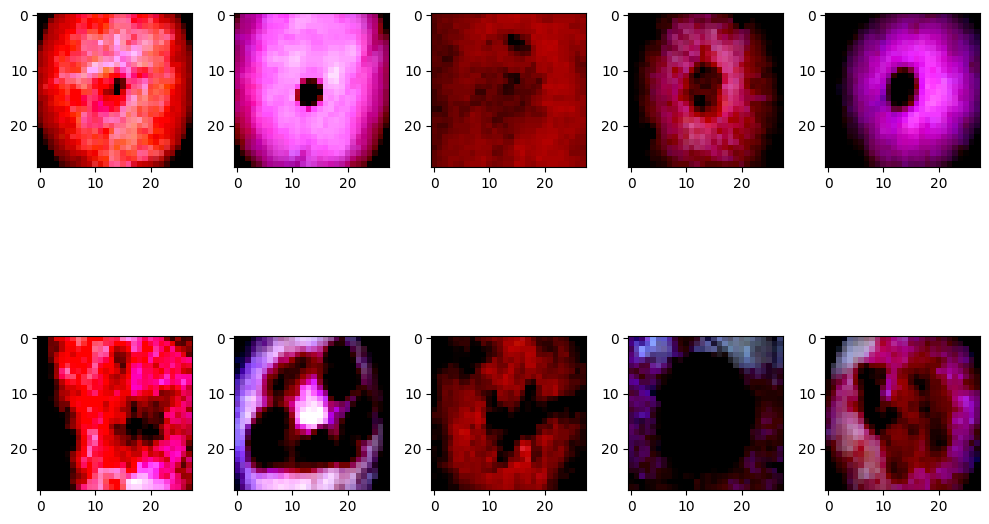

In [ ]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [ ]:
X_train_pad= np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),'mean')

In [ ]:
X_test_pad= np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),'mean')

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Example Dataset (You can use your dataset instead)
X, y = make_classification(n_classes=2, class_sep=2,
                            weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                            flip_y=0, n_features=20, n_clusters_per_class=1,
                            n_samples=1000, random_state=42)

print("Original class distribution:", dict(zip(*np.unique(y, return_counts=True))))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", dict(zip(*np.unique(y_train_smote, return_counts=True))))

Original class distribution: {0: 100, 1: 900}
Class distribution after SMOTE: {0: 720, 1: 720}


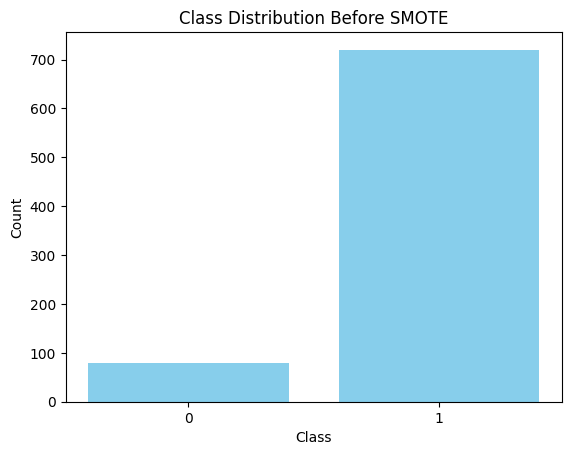

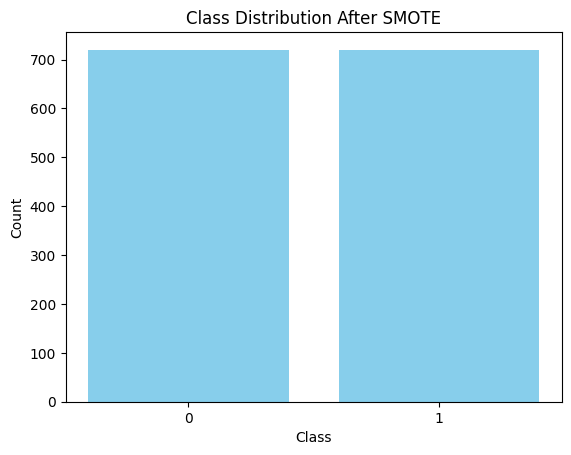

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(y, title):
    classes, counts = np.unique(y, return_counts=True)
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(classes)
    plt.show()

# Plot before and after SMOTE
plot_class_distribution(y_train, "Class Distribution Before SMOTE")
plot_class_distribution(y_train_smote, "Class Distribution After SMOTE")

**GMM based Undersampling**

Original class distribution: {0: 900, 1: 100}


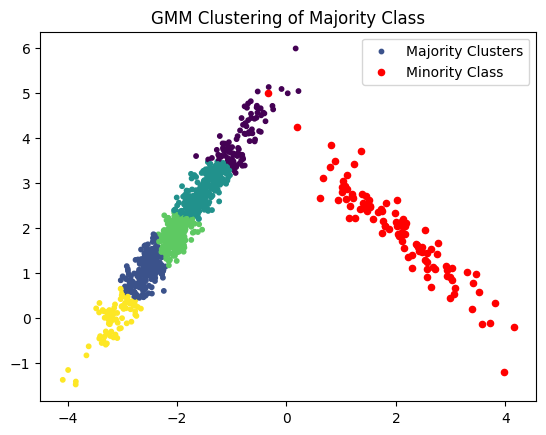

Class distribution after undersampling: {0.0: 100, 1.0: 100}


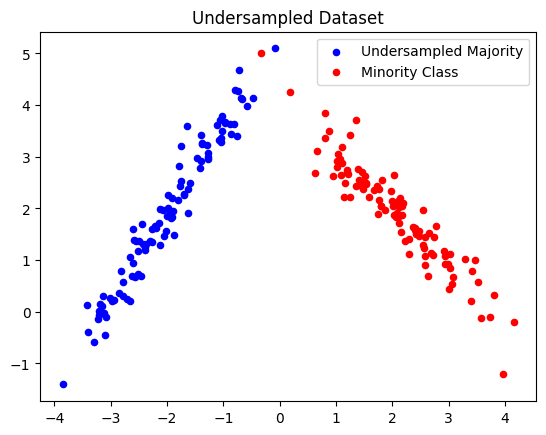

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Example Dataset (You can use your dataset)
X, y = make_classification(n_classes=2, class_sep=2,
                            weights=[0.9, 0.1], n_informative=2, n_redundant=0, # Changed n_informative to 2 and n_redundant to 0
                            flip_y=0, n_features=2, n_clusters_per_class=1,
                            n_samples=1000, random_state=42)

print("Original class distribution:", dict(zip(*np.unique(y, return_counts=True))))

# Separate majority and minority classes
X_majority = X[y == 0]
X_minority = X[y == 1]

# Fit GMM to the majority class
n_components = 5  # Number of clusters for GMM
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_majority)

# Predict cluster labels
cluster_labels = gmm.predict(X_majority)

# Visualize clusters
plt.scatter(X_majority[:, 0], X_majority[:, 1], c=cluster_labels, cmap='viridis', s=10, label='Majority Clusters')
plt.scatter(X_minority[:, 0], X_minority[:, 1], color='red', s=20, label='Minority Class')
plt.title("GMM Clustering of Majority Class")
plt.legend()
plt.show()

# Undersample majority class
undersampled_X_majority = []
samples_per_cluster = len(X_minority) // n_components  # Match minority size across clusters

for cluster in range(n_components):
    cluster_points = X_majority[cluster_labels == cluster]
    undersampled_points = cluster_points[np.random.choice(len(cluster_points),
                                                          samples_per_cluster,
                                                          replace=False)]
    undersampled_X_majority.append(undersampled_points)

# Combine undersampled majority and minority class
undersampled_X_majority = np.vstack(undersampled_X_majority)
X_undersampled = np.vstack((undersampled_X_majority, X_minority))
y_undersampled = np.hstack((np.zeros(len(undersampled_X_majority)), np.ones(len(X_minority))))

print("Class distribution after undersampling:", dict(zip(*np.unique(y_undersampled, return_counts=True))))

# Visualize undersampled dataset
plt.scatter(undersampled_X_majority[:, 0], undersampled_X_majority[:, 1], color='blue', s=20, label='Undersampled Majority')
plt.scatter(X_minority[:, 0], X_minority[:, 1], color='red', s=20, label='Minority Class')
plt.title("Undersampled Dataset")
plt.legend()
plt.show()

**Feature selection**

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Step 1: Generate or Load Dataset
# Example dataset
X, y = make_classification(n_samples=1000, n_features=7, n_informative=2,
                           n_redundant=4, n_repeated=0, random_state=42)

# Step 2: Compute Mutual Information (MIGM) for each feature
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 3: Create a DataFrame for better visualization
features = [f"Feature {i}" for i in range(X.shape[1])]
mi_df = pd.DataFrame({'Feature': features, 'Mutual Information': mi_scores})
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

# Display MI scores
print("Mutual Information Scores:")
print(mi_df)



# Step 5: Select Features Based on a Threshold or Top-K
# Threshold-based selection
threshold = 0.05  # Customize based on your data
selected_features = mi_df[mi_df['Mutual Information'] > threshold]['Feature']
print(f"Features selected based on threshold ({threshold}): {list(selected_features)}")

# Top-K selection
k = 10  # Number of top features to select
top_k_features = mi_df.iloc[:k]['Feature']
print(f"Top-{k} features: {list(top_k_features)}")

# Step 6: Filter Dataset with Selected Features
selected_indices = [int(f.split()[1]) for f in top_k_features]  # Get indices of top-k features
X_selected = X[:, selected_indices]


Mutual Information Scores:
     Feature  Mutual Information
2  Feature 2            0.356116
1  Feature 1            0.355846
4  Feature 4            0.355103
3  Feature 3            0.334750
5  Feature 5            0.067496
6  Feature 6            0.033981
0  Feature 0            0.007501
Features selected based on threshold (0.05): ['Feature 2', 'Feature 1', 'Feature 4', 'Feature 3', 'Feature 5']
Top-10 features: ['Feature 2', 'Feature 1', 'Feature 4', 'Feature 3', 'Feature 5', 'Feature 6', 'Feature 0']


**IDLP-RVM**

In [ ]:
!pip install sklearn-rvm

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 186s 154ms/step
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1359
           1       0.94      1.00      0.97      1318
           2       0.85      0.92      0.88      1262
           3       0.98      1.00      0.99      1351
           4       0.94      0.59      0.73      1374
           5       0.97      1.00      0.99      1358
           6       0.82      0.94      0.87      1365

    accuracy                           0.92      9387
   macro avg       0.92      0.92      0.92      9387
weighted avg       0.92      0.92      0.91      9387



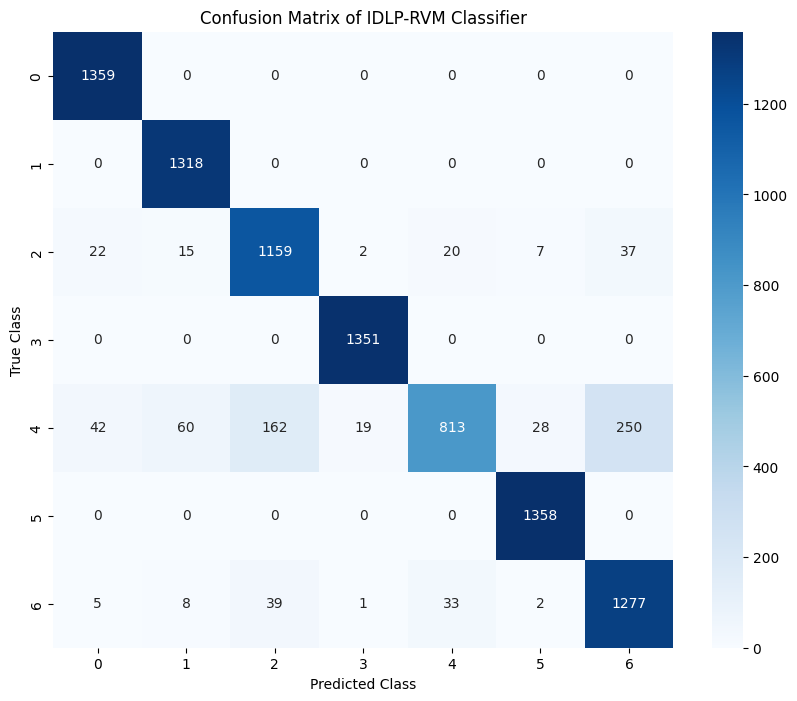

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define image shape
img_shape = (32, 32, 3)

# Load IDLP-RVM without the top layers (used as a feature extractor)
base_model = ResNet50V2(include_top=False, input_shape=img_shape, weights='imagenet')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features from training data
X_train_features = feature_extractor.predict(X_train_pad)
X_test_features = feature_extractor.predict(X_test_pad)

# Flatten the extracted features
X_train_flattened = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_flattened = X_test_features.reshape(X_test_features.shape[0], -1)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_flattened)
X_test_normalized = scaler.transform(X_test_flattened)

# Train-Test Split (if needed)
# X_train_part, X_val, Y_train_part, Y_val = train_test_split(X_train_normalized, Y_train, test_size=0.2, random_state=42)

# Train IDLP-RVM
knn = KNeighborsClassifier(n_neighbors=5)  # Choose the value of 'k' (e.g., 5)
Y_train_labels = np.argmax(Y_train, axis=1)  # Convert one-hot encoded labels to class indices
knn.fit(X_train_normalized, Y_train_labels)

# Evaluate IDLP-RVM
Y_pred = knn.predict(X_test_normalized)
Y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class indices

# Print Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(Y_true, Y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(len(np.unique(Y_true))),
            yticklabels=range(len(np.unique(Y_true))))
plt.title("Confusion Matrix of IDLP-RVM Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


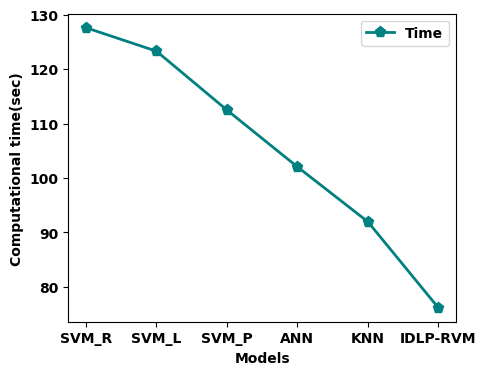

In [ ]:
import matplotlib.pyplot as plt

A_r= [127.5874,123.2813,112.4792,102.0487,91.9742,76.1851]


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(A_r,  linewidth=2, linestyle='-',label='Time',marker="p",markersize="8",color='teal')



x1 = [0,1,2,3,4,5]
D = ["SVM_R","SVM_L","SVM_P","ANN","KNN","IDLP-RVM"]
ax.set_xticks(x1)
ax.set_xticklabels(D, minor=False, rotation=0,fontweight='bold',fontsize=10)


#ax.set_xlabel('Number of Iterations',fontsize=15)
#ax.set_Xlabel('Classifiers',fontsize=12,fontweight='bold')
ax.set_ylabel('Computational time(sec)',fontsize=10,fontweight='bold')
plt.xlabel("Models",fontweight='bold',fontsize=10)
plt.yticks(fontsize=10,fontweight='bold')

legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties, fontsize=14,loc='upper right', ncol=4)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          #fancybox=False, shadow=False, ncol=4)
#plt.ylim(0,0.2)

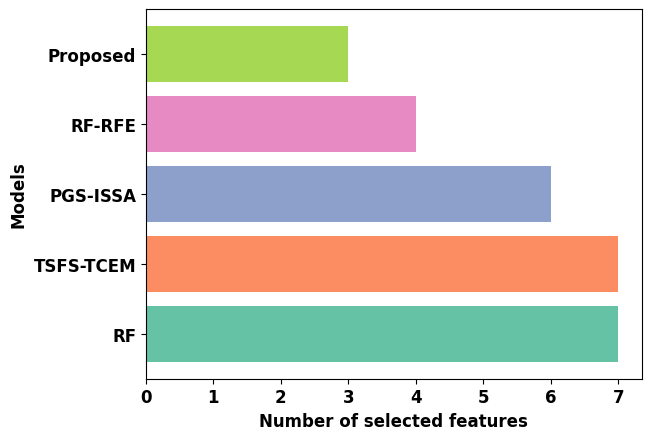

In [ ]:
import matplotlib.pyplot as plt
col_map = plt.get_cmap('Set2')
#col_map = plt.get_cmap('Set1')
models = ["RF","TSFS-TCEM","PGS-ISSA","RF-RFE","Proposed"]

Nooffeatures = [7,7,6,4,3]

 #colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']
# Plot the bar graph
plot = plt.barh(models, Nooffeatures,color=col_map.colors)



# Add labels and title
#plt.title("Bar Chart")
#plt.ylabel("Algorithms",fontweight='bold',fontsize=12)
plt.xlabel("Number of selected features",fontweight='bold',fontsize=12)
plt.ylabel("Models",fontweight='bold',fontsize=12)
plt.yticks(fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')

plt.show()

**Dataset-2**

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import random
import time
rng = np.random.default_rng()
import math
import sys
import warnings
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics                         #import evaluation metric package
from sklearn.ensemble import RandomForestClassifier #import decision tree package
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/1st work/ISIC-2017_Training_Part3_GroundTruth.csv')
data

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0
...,...,...,...
1995,ISIC_0015220,0.0,1.0
1996,ISIC_0015233,0.0,1.0
1997,ISIC_0015260,0.0,1.0
1998,ISIC_0015284,1.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   image_id              2000 non-null   object 
 1   melanoma              2000 non-null   float64
 2   seborrheic_keratosis  2000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 47.0+ KB


In [ ]:
data.columns

Index(['image_id', 'melanoma', 'seborrheic_keratosis'], dtype='object')

In [ ]:
#import dataset
data = pd.read_csv('/content/drive/MyDrive/1st work/ISIC-2017_Training_Part3_GroundTruth.csv')

#ordinal Encoder
ord_enc = OrdinalEncoder()
X_cat= ord_enc.fit_transform(data)
X_cat= pd.DataFrame(X_cat)

#Divide into X and y datasets
feat = X_cat.iloc[:,:-1].values
label = X_cat.iloc[:,-1:].values

#Min max Scaler
scaler = MinMaxScaler()
feat=scaler.fit_transform(feat)


In [ ]:
feat.shape[0]

2000

**Over Sampling**

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import time
time_start = time.time()

smo = SMOTE(random_state=42)
#smo = SMOTE(ratio={1:177803,2:177803,3:177803,4:177803,5:177803,6:177803,7:177803,8:177803,9:177803},random_state=42)

X_smo, y_smo = smo.fit_resample(feat, label)
print(sorted(Counter(y_smo).items()))

time_end = time.time()
time = time_end - time_start
print("time:",time)

[(0.0, 1746), (1.0, 1746)]
time: 0.008339166641235352


Under Sampling

In [ ]:
from collections import Counter
feat = X_smo
label= y_smo
X=np.array(feat)
b=np.array(label)
bb=b.reshape(b.shape[0],)
y10 = np.int32(bb)
X.shape
sorted(Counter(y10).items())

[(0, 1746), (1, 1746)]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.2, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
pop    = 9    # number of particles
MaxIter    = 100  # maximum number of iterations
opts = {'k':k, 'fold':fold, 'pop':pop, 'MaxIter':MaxIter}

In [ ]:
import numpy as np
from numpy.random import rand
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']

    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    #print('Error Value is：',error)
    #print('Accuracy is：',acc)
    return error


# Error rate & Feature size
def fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)

    return cost

In [ ]:
# Required Libraries
import copy
import numpy  as np
import random
import os

# Function: Initialize Variables
def initial_population(population_size, min_values, max_values, list_of_functions):
    population = np.zeros((population_size, len(min_values) ))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
             population[i,j] = random.uniform(min_values[j], max_values[j])
    return population
# Function: Fast Non-Dominated Sorting
def fast_non_dominated_sorting(population, number_of_functions = 2):
    S     = [[] for i in range(0, population.shape[0])]
    front = [[]]
    n     = [0 for i in range(0, population.shape[0])]
    rank  = [0 for i in range(0, population.shape[0])]
    for p in range(0, population.shape[0]):
        S[p] = []
        n[p] = 0
        for q in range(0, population.shape[0]):
            if ((population[p,-number_of_functions:] <= population[q,-number_of_functions:]).all()):
                if (q not in S[p]):
                    S[p].append(q)
            elif ((population[q,-number_of_functions:] <= population[p,-number_of_functions:]).all()):
                n[p] = n[p] + 1
        if (n[p] == 0):
            rank[p] = 0
            if (p not in front[0]):
                front[0].append(p)
    i = 0
    while (front[i] != []):
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] = n[q] - 1
                if(n[q] == 0):
                    rank[q] = i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    rank = np.zeros((population.shape[0], 1))
    for i in range(0, len(front)):
        for j in range(0, len(front[i])):
            rank[front[i][j], 0] = i + 1
    return rank

# Function: Sort Population by Rank
def sort_population_by_rank(population, rank):
    idx        = np.argsort(rank[:,0], axis = 0).tolist()
    rank_new = np.zeros((population.shape[0], 1))
    population_new = np.zeros((population.shape[0], population.shape[1]))
    for i in range(0, population.shape[0]):
        rank_new[i,0] = rank[idx[i],0]
        for k in range(0, population.shape[1]):
            population_new[i,k] = population[idx[i],k]
    return population_new, rank_new

# Function: Crowding Distance (Adapted from PYMOO)
def crowding_distance_function(pop, M):
    infinity   = 1e+11
    population = copy.deepcopy(pop[:,-M:])
    population = population.reshape((pop.shape[0], M))
    if (population.shape[0] <= 2):
        return np.full(population.shape[0], infinity)
    else:
        arg_1      = np.argsort(population, axis = 0, kind = 'mergesort')
        population = population[arg_1, np.arange(M)]
        dist       = np.concatenate([population, np.full((1, M), np.inf)]) - np.concatenate([np.full((1, M), -np.inf), population])
        idx        = np.where(dist == 0)
        a          = np.copy(dist)
        b          = np.copy(dist)
        for i, j in zip(*idx):
            a[i, j] = a[i - 1, j]
        for i, j in reversed(list(zip(*idx))):
            b[i, j] = b[i + 1, j]
        norm            = np.max(population, axis = 0) - np.min(population, axis = 0)
        norm[norm == 0] = np.nan
        a, b            = a[:-1]/norm, b[1:]/norm
        a[np.isnan(a)]  = 0.0
        b[np.isnan(b)]  = 0.0
        arg_2           = np.argsort(arg_1, axis = 0)
        crowding        = np.sum(a[arg_2, np.arange(M)] + b[arg_2, np.arange(M)], axis = 1) / M
    crowding[np.isinf(crowding)] = infinity
    crowding                     = crowding.reshape((-1,1))
    return crowding

# Function:Crowded Comparison Operator
def crowded_comparison_operator(rank, crowding_distance, individual_1 = 0, individual_2 = 1):
    selection = False
    if (rank[individual_1,0] < rank[individual_2,0]) or ((rank[individual_1,0] == rank[individual_2,0]) and (crowding_distance[individual_1,0] > crowding_distance[individual_2,0])):
        selection = True
    return selection

# Function: Offspring
def breeding(population, rank, crowding_distance, min_values, max_values, mu, list_of_functions):
    offspring   = np.copy(population)
    parent_1    = 0
    parent_2    = 1
    b_offspring = 0
    for i in range (0, offspring.shape[0]):
        i1, i2, i3, i4 = random.sample(range(0, len(population) - 1), 4)
        if (crowded_comparison_operator(rank, crowding_distance, individual_1 = i1, individual_2 = i2) == True):
            parent_1 = i1
        elif (crowded_comparison_operator(rank, crowding_distance, individual_1 = i2, individual_2 = i1) == True):
            parent_1 = i2
        else:
            rand = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (rand > 0.5):
                parent_1 = i1
            else:
                parent_1 = i2
        if (crowded_comparison_operator(rank, crowding_distance, individual_1 = i3, individual_2 = i4) == True):
            parent_2 = i3
        elif (crowded_comparison_operator(rank, crowding_distance, individual_1 = i4, individual_2 = i3) == True):
            parent_2 = i4
        else:
            rand = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (rand > 0.5):
                parent_2 = i3
            else:
                parent_2 = i4
        for j in range(0, offspring.shape[1] - len(list_of_functions)):
            rand   = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            rand_b = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (rand <= 0.5):
                b_offspring = 2*(rand_b)
                b_offspring = b_offspring**(1/(mu + 1))
            elif (rand > 0.5):
                b_offspring = 1/(2*(1 - rand_b))
                b_offspring = b_offspring**(1/(mu + 1))
            offspring[i,j] = np.clip(((1 + b_offspring)*population[parent_1, j] + (1 - b_offspring)*population[parent_2, j])/2, min_values[j], max_values[j])
            if(i < population.shape[0] - 1):
                offspring[i+1,j] = np.clip(((1 - b_offspring)*population[parent_1, j] + (1 + b_offspring)*population[parent_2, j])/2, min_values[j], max_values[j])
        for k in range (1, len(list_of_functions)):
            offspring[i,k] = list_of_functions[k](offspring[i,0:offspring.shape[1]-len(list_of_functions)])
    return offspring

# Function: Mutation
def mutation(offspring, mutation_rate, eta, min_values , max_values, list_of_functions ):
    d_mutation = 0
    for i in range (0, offspring.shape[0]):
        for j in range(0, offspring.shape[1] - len(list_of_functions)):
            probability = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (probability < mutation_rate):
                rand   = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                rand_d = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                if (rand <= 0.5):
                    d_mutation = 2*(rand_d)
                    d_mutation = d_mutation**(1/(eta + 1)) - 1
                elif (rand > 0.5):
                    d_mutation = 2*(1 - rand_d)
                    d_mutation = 1 - d_mutation**(1/(eta + 1))
                offspring[i,j] = np.clip((offspring[i,j] + d_mutation), min_values[j], max_values[j])
        for k in range (1, len(list_of_functions)):
            offspring[i,k] = list_of_functions[k](offspring[i,0:offspring.shape[1]-len(list_of_functions)])
    return offspring

############################################################################

# NSGA II Function
def non_dominated_sorting_genetic_algorithm_II(population_size, mutation_rate, min_values, max_values, list_of_functions, generations, mu, eta):
    count      = 0
    population = initial_population(population_size = population_size, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)
    offspring  = initial_population(population_size = population_size, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)
    while (count <= generations):
        #print('Generation = ', count)
        population        = np.vstack([population, offspring])
        rank              = fast_non_dominated_sorting(population, number_of_functions = len(list_of_functions))
        population, rank  = sort_population_by_rank(population, rank)
        population, rank  = population[0:population_size,:], rank[0:population_size,:]
        crowding_distance = crowding_distance_function(population, len(list_of_functions))
        offspring         = breeding(population, rank, crowding_distance, mu = mu, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)
        offspring         = mutation(offspring, mutation_rate = mutation_rate, eta = eta, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)
        count             = count + 1
    return population

In [ ]:
import random
import time
import numpy as np
from numpy.random import rand
rng = np.random.default_rng()
# Calculate fitness values for each Flamingo.
def fun2(x):
    y = (len(x))
    return y

def fun1(X):
    fitness = np.zeros(2)
    fitness[0] = fun(xtrain, ytrain,X, opts)
    pos        = np.asarray(range(0, dim))
    fitness[1]  = len(pos[X == 1])
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Flamingo's according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.

def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X

 #  Binary Conversion
def binary_conversion(X, thres, len, dim):
    if len == 1:
      X = np.reshape(X, (1, dim))
    Xbin = np.zeros([len, dim])
    for i in range(len):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0

    return Xbin
# This function is to initialize the Flamingo's population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    b = np.zeros([1, pop])
    a = np.zeros([1, pop])
    ox = np.zeros([pop, dim])
    m = np.zeros([1, pop])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    X = binary_conversion(X, thres, pop, dim)
    for k in range(pop):
            b[0,k]=max(X[k,:])
            a[0,k]=min(X[k,:])
            ox[k,:]= (a[0,k]+b[0,k]) - X[k,:];
            m[0,k]=(a[0,k]+b[0,k])/2;
    return X,m,ox

def quazi(ox,pop,dim, m):
        X = np.zeros([pop, dim])
        for i in range(pop):
            for j in range(dim):
              if (ox[i,j] <= m[0,i]):
                X[i, j] = m[0,i]+(ox[i,j]-m[0,i])*random.random();         #new Flamingo's based on QOBL

              if ox[i,j] > m[0,i]:
                X[i,j]=ox[i,j]+(m[0,i]-ox[i,j])*random.random();
            #end

        return X

# This function is randomly evaluated between negative 1 and 1.
def rand_1():
    a=random.random()
    if a>0.5:
        return 1
    else:
        return -1


# The first phase migratory flamingo update function.
def congeal(X,PMc,dim,Xb):
    for j in range(int(PMc)):
        for i in range(dim):
            AI = rng.normal(loc=0, scale=1.2, size=1)
            X[j, i] = X[j, i] + (Xb[i] - X[j, i]) * AI
    return X

# Foraging flamingo position update function.
def untrammeled(X, Xb, PMc, PMu, dim,):
    for j in range(int(PMc), int(PMc+PMu)):
        for i in range(dim):
            X[j, i] = (X[j, i] + rand_1() * Xb[i] + np.random.randn() * (np.random.randn() * np.abs(Xb[i] + rand_1() * X[j, i]))) / (rng.chisquare(df=8, size=1))
    return X

# The second stage migratory flamingo position update function.
def flee(X, PMc, PMu, pop, dim, Xb):
    for j in range(int(PMc+PMu), pop):
        for i in range(dim):
            A1 = rng.normal(loc=0, scale=1.2, size=1)
            X[j, i] = X[j, i]+(Xb[i]-X[j, i])*A1
    return X

In [ ]:
def MOfsa_NSGA(pop,dim,lb,ub,Max_iter,fun,thres):

    X,m,ox = initial(pop, dim, lb,ub)                    # Initialize the number of Flamingos
    fitness1 = np.zeros([pop, 2])
    for i in range(pop):
      fitness1[i,:] = fun1(X[i, :])
    fitness = fitness1[:,0]
    fitness2 = fitness1[:,1]

    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of Flamingo.
    X = SortPosition(X, sortIndex)                  # Sort the Flamingo.
    GbestScore = fitness[0]                         # The optimal value for the current iteration.
    GbestScore1 = fitness2[1]
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    Curve1 = np.zeros([Max_iter, 1])
    Xnew = np.zeros([pop, dim])

    for t in range(Max_iter):
        # Population based on QOBL
        Q_pos=quazi(ox,pop,dim, m)
        Qfitness1 = fun1(Q_pos[0,:])                 #Evaluate its quality/fitness; Fi
        Qfitness =Qfitness1[0]
        MP_b=0.1                                     # The basic proportion of flamingos migration in the first stage.
        Vs=random.random()
        PMf=int((1-MP_b)*Vs*pop)                     # The number of flamingos migrating in the second stage.
        PMc=MP_b*pop                                 # The number of flamingos that migrate in the first phase.
        Pmu=pop-PMc-PMf                              # The number of flamingos foraging for food.

        if (Qfitness <= GbestScore):                 # if (flamingo-QOBL fitness < initial fitness),
            fitness[0] = Qfitness                    # Replace initial solution by the new solution;
            fitness2[0] = Qfitness1[1]
            #print(fitness2)
            print('updating QOBL based population')
            X[0,:] = Q_pos
            Xb = Q_pos

        # In the first stage of migration, flamingos undergo location updates.
            X = congeal(X, PMc, dim, Xb)
        # The foraging flamingos update their position.
            X = untrammeled(X, Xb, PMc, Pmu, dim)
        # In the second stage, the flamingos were relocated for location renewal.
            Xnew = flee(X, PMc, Pmu, pop, dim, Xb)

            Xnew = BorderCheck1(Xnew, lb, ub, dim)

            Xnew = binary_conversion(np.array(Xnew),thres,1, dim)
            tempFitness1 = fun1(Xnew)
            tempFitness = tempFitness1[0]
            qf = tempFitness1[1]

            if (tempFitness <= fitness[i]):
              fitness2 = np.array(fitness2)
              fitness[i] = tempFitness
              fitness2[i]= qf

              X[i,:] = Xnew[i,:]

        Insga2_p= non_dominated_sorting_genetic_algorithm_II(pop, mutation_rate, lb, ub,
                                                                    list_of_functions, generations, mu, eta)

        for i in range(pop):
          X[i,:] = BorderCheck1(X[i,:], lb, ub ,dim)
        Ybest,index = SortFitness(fitness) # Sort fitness values.
        X = SortPosition(X, index)
        Ybest2 = fitness2[index]
        Xbest = X[0:archive_size,:]
        for a in range(archive_size):
          Insga2_p[a,:] = binary_conversion(Insga2_p[a,:],thres,1, dim)
          fit1 = fun1(Insga2_p[a,:])
          fit = fit1[0]
          fit2 = fit1[1]
          if (fit < GbestScore):
            Ybest[0] = fit
            Ybest2[0]= fit2
            #print('Ybest',Ybest[1])
            print('updating insgaII population')
            X[0,:] = Insga2_p[a,:]
        if (Ybest[0] <= GbestScore):
          GbestScore = Ybest[0]     # Update the global optimal solution.
          GbestScore1 = Ybest2[0]
          #print('GbestScore1',GbestScore1)
          GbestPositon[0, :] = X[index[0], :]           # Sort fitness values
        Curve[t] = GbestScore
        Curve1[t] = GbestScore1
        print('Iteration and fitness value',t,Curve[t])
    return GbestScore,GbestPositon,Curve,Curve1

In [ ]:
%%time
rng = np.random.default_rng()
#time_start = time.time()
# parameters

k    = 5                    # k-value in KNN
pop = 10                    # population size.
MaxIter = 50               # Maximum number of iterations.
opts = {'k':k, 'fold':fold, 'pop':pop, 'MaxIter':MaxIter}
dim = np.size(xtrain, 1)    # The dimension.
fl=-1                       # The lower bound of the search interval.
ul=1                        # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
thres= 0.5
archive_size = 10
mutation_rate = 0.1
generations = 1
mu = 1
eta = 1
list_of_functions = [fun1, fun2]
GbestScore, GbestPositon, Curve,fitness2 = MOfsa_NSGA(pop, dim, lb, ub, MaxIter, fun, thres)
time_end = time.time()
# Best feature subset
Gbin = binary_conversion(GbestPositon,thres,1, dim)
Gbin       = Gbin.reshape(dim)
pos        = np.asarray(range(0, dim))
sel_index  = pos[Gbin == 1]
num_feat   = len(sel_index)
# Create dictionary
MOFSA_data = {'sf': sel_index, 'c': Curve, 'nf': num_feat}
#time_end = time.time()
#print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('Number of features selected：',num_feat)
print('SFI is：',sel_index)

Iteration and fitness value 0 [0.17920601]
Iteration and fitness value 1 [0.17920601]
Iteration and fitness value 2 [0.17920601]
Iteration and fitness value 3 [0.17920601]
Iteration and fitness value 4 [0.17920601]
Iteration and fitness value 5 [0.17920601]
Iteration and fitness value 6 [0.17920601]
Iteration and fitness value 7 [0.17920601]
Iteration and fitness value 8 [0.17920601]
Iteration and fitness value 9 [0.17920601]
Iteration and fitness value 10 [0.17920601]
Iteration and fitness value 11 [0.17920601]
Iteration and fitness value 12 [0.17920601]
Iteration and fitness value 13 [0.17920601]
Iteration and fitness value 14 [0.17920601]
Iteration and fitness value 15 [0.17920601]
Iteration and fitness value 16 [0.17920601]
Iteration and fitness value 17 [0.17920601]
Iteration and fitness value 18 [0.17920601]
Iteration and fitness value 19 [0.17920601]
Iteration and fitness value 20 [0.17920601]
Iteration and fitness value 21 [0.17920601]
Iteration and fitness value 22 [0.17920601

In [ ]:
sf   = MOFSA_data['sf']
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug
#weighted KNN
mdl       = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=1,
                           n_neighbors=5,
                           p=2,
                           weights='uniform')
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
print("Accuracy:", 100 * Acc)

Accuracy: 82.40343347639485


In [ ]:
# Predicting samples
ypred = mdl.predict(x_valid)

def Evaluate(x_valid,y_valid):

  Acc       = np.sum(y_valid == y_pred)  / num_valid
  Cohen_Score=cohen_kappa_score(y_valid, ypred)
  Matthew_Score=matthews_corrcoef(y_valid, ypred)
  # Mean absolute error of the predictions
  mae = mean_absolute_error(mdl.predict(x_valid), y_valid)
  mse = mean_squared_error(mdl.predict(x_valid), y_valid)
  rmse = np.sqrt(mse)
  return Acc,mae,mse,rmse,Cohen_Score,Matthew_Score

In [ ]:
class Stats:

    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1

    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)

    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)

    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()

    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [ ]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()),
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [ ]:
def performance(x_valid,y_valid,ypred):
  print("Evaluation Matrices of WKNN")
  #print("Classification Report","\n")
  print(classification_report(y_valid, ypred))
  score = round(accuracy_score(y_valid, ypred),7)
  cm1 = cm(y_valid, ypred)
  FP = cm1.sum(axis=0) - np.diag(cm1)
  FN = cm1.sum(axis=1) - np.diag(cm1)
  TP = np.diag(cm1)
  TN = cm1.sum() - (FP + FN + TP)
  # Sensitivity, hit rate, recall, or true positive rate
  Sensitivity = TP/(TP+FN)
  # Specificity or true negative rate
  Specificity = TN/(TN+FP)

  #print("\n")
  Acc,mae,mse,rmse,Cohen_Score,Matthew_Score=Evaluate(x_valid,y_valid)
  print('Accuracy is',Acc)
  print('Specificity',sum(Specificity)/len(Specificity))
  #print('MAE is',mae)
  #print('MSE is',mse)
  #print('RMSE is',rmse)
  print('Cohen_Score is',Cohen_Score)
  print('Matthew_Score is',Matthew_Score)

  print("\n")
  print("Confusion Matrix","\n")
  sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3,
        square = True, cmap = 'PuBu')
  plt.ylabel('Actual label',fontsize=15)
  plt.xlabel('Predicted label',fontsize=15)
  plt.title('Accuracy Score: {0}'.format(score), size = 13)
  plt.show()



Evaluation Matrices of WKNN
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       350
         1.0       0.80      0.87      0.83       349

    accuracy                           0.82       699
   macro avg       0.83      0.82      0.82       699
weighted avg       0.83      0.82      0.82       699

Accuracy is 0.8240343347639485
Specificity 0.824101514531314
MAE is 0.1759656652360515
MSE is 0.1759656652360515
RMSE is 0.4194826161309328
Cohen_Score is 0.6481154817400843
Matthew_Score is 0.6510232206896768


Confusion Matrix 



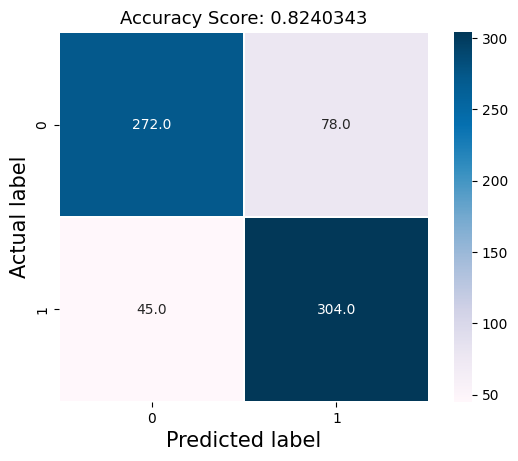

In [ ]:
performance(x_valid,y_valid,ypred)

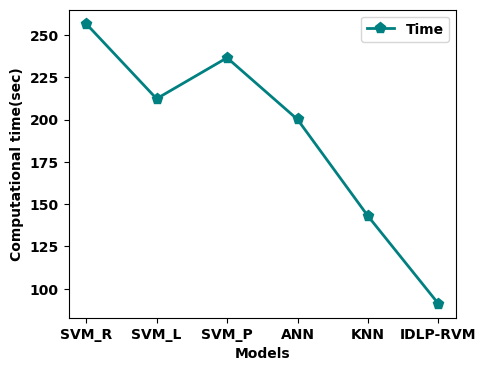

In [ ]:
import matplotlib.pyplot as plt

A_r= [256.5874,212.2813,236.4792,200.0487,142.9742,91.1851]


fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(A_r,  linewidth=2, linestyle='-',label='Time',marker="p",markersize="8",color='teal')



x1 = [0,1,2,3,4,5]
D = ["SVM_R","SVM_L","SVM_P","ANN","KNN","IDLP-RVM"]
ax.set_xticks(x1)
ax.set_xticklabels(D, minor=False, rotation=0,fontweight='bold',fontsize=10)


#ax.set_xlabel('Number of Iterations',fontsize=15)
#ax.set_Xlabel('Classifiers',fontsize=12,fontweight='bold')
ax.set_ylabel('Computational time(sec)',fontsize=10,fontweight='bold')
plt.xlabel("Models",fontweight='bold',fontsize=10)
plt.yticks(fontsize=10,fontweight='bold')

legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties, fontsize=14,loc='upper right', ncol=4)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          #fancybox=False, shadow=False, ncol=4)
#plt.ylim(0,0.2)

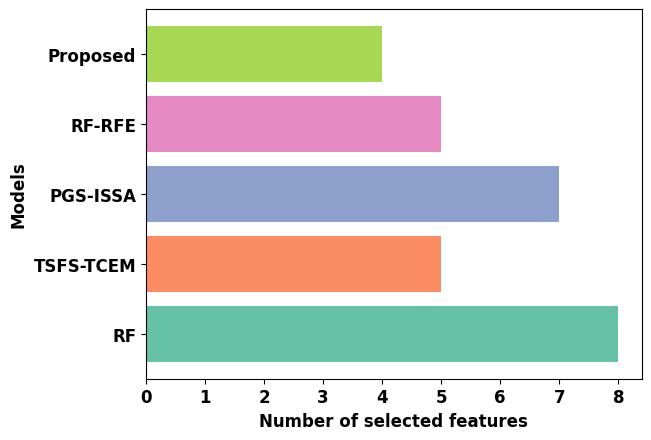

In [ ]:
import matplotlib.pyplot as plt
col_map = plt.get_cmap('Set2')
#col_map = plt.get_cmap('Set1')
models = ["RF","TSFS-TCEM","PGS-ISSA","RF-RFE","Proposed"]

Nooffeatures = [8,5,7,5,4]

 #colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']
# Plot the bar graph
plot = plt.barh(models, Nooffeatures,color=col_map.colors)



# Add labels and title
#plt.title("Bar Chart")
#plt.ylabel("Algorithms",fontweight='bold',fontsize=12)
plt.xlabel("Number of selected features",fontweight='bold',fontsize=12)
plt.ylabel("Models",fontweight='bold',fontsize=12)
plt.yticks(fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')

plt.show()